# Exploratory Data Analysis

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas.testing as tm
import matplotlib as plt
from matplotlib import pyplot as plt

To understand the data, knowing its patterns and how the number of infections, hospitalization, and casualties of the coronavirus developed, exploratory data analysis (EDA) is a very important phase before doing any data modelling with computational intelligence models.
The EDA process contains data visualisations, as well as data transformation techniques, like feature engineering, data aggregation, and resampling. 
The following data plots were implemented in this notebook:
    * The run-sequence plot, showing the development of data
    * Lag plot, that can indicate randomness in data
    * Box plot, that shows the data distribution, and detects outliers

## Data source

In this notebook and all next notebooks covering the EDA, analysis, and modelling on COVID-19 cases, the dataset was derived from source: https://data.rivm.nl/covid-19/

With the following dataset extracted from the site: COVID-19_aantallen_gemeente_cumulatief.csv
All notebooks used data originating from date: 1 may 2021, from this dataset. 


In [23]:
dutch_data_01 = pd.read_csv('/Users/stevenkraamwinkel/Desktop/Datasets 1 mei/COVID-19_aantallen_gemeente_cumulatief_01_05.csv', parse_dates=True, delimiter=';')
display(dutch_data_01)


,Date_of_report,Municipality_code,Municipality_name,Province,Total_reported,Hospital_admission,Deceased
0,13/03/2020 10:00,GM0003,Appingedam,Groningen,0,0,0
1,13/03/2020 10:00,GM0010,Delfzijl,Groningen,0,0,0
2,13/03/2020 10:00,GM0014,Groningen,Groningen,3,0,0
3,13/03/2020 10:00,GM0024,Loppersum,Groningen,0,0,0
4,13/03/2020 10:00,GM0034,Almere,Flevoland,1,1,0
...,...,...,...,...,...,...,...
151955,01/05/2021 10:00,NaN,NaN,Noord-Holland,668,20,2
151956,01/05/2021 10:00,NaN,NaN,Zuid-Holland,2312,46,15
151957,01/05/2021 10:00,NaN,NaN,Zeeland,56,4,1
151958,01/05/2021 10:00,NaN,NaN,Noord-Brabant,1144,29,7


In [24]:
#Selecting columns
dutch_data_01 = dutch_data_01[['Date_of_report', 'Total_reported', 'Hospital_admission', 'Deceased']]

dutch_data_01['Date_of_report']= pd.to_datetime(dutch_data_01['Date_of_report'], format='%d/%m/%Y %H:%M')
dutch_data_01 = dutch_data_01.set_index('Date_of_report')

display(dutch_data_01)
dutch_data_01.dtypes

,Total_reported,Hospital_admission,Deceased
Date_of_report,,,
2020-03-13 10:00:00,0,0,0
2020-03-13 10:00:00,0,0,0
2020-03-13 10:00:00,3,0,0
2020-03-13 10:00:00,0,0,0
2020-03-13 10:00:00,1,1,0
...,...,...,...
2021-05-01 10:00:00,668,20,2
2021-05-01 10:00:00,2312,46,15
2021-05-01 10:00:00,56,4,1


Total_reported        int64
Hospital_admission    int64
Deceased              int64
dtype: object

In [25]:
dutch_data_01 = dutch_data_01.resample('D').sum()
dutch_data_01

,Total_reported,Hospital_admission,Deceased
Date_of_report,,,
2020-03-13,804,115,9
2020-03-14,959,136,12
2020-03-15,1135,162,19
2020-03-16,1413,205,23
2020-03-17,1705,314,40
...,...,...,...
2021-04-27,1472674,28445,17093
2021-04-28,1481323,28517,17104
2021-04-29,1488594,28580,17124


## Total COVID-19 cases reported per day

In [26]:
#Cumulative function found from source: 
#https://codereview.stackexchange.com/questions/117183/extracting-original-values-from-cumulative-sum-values

#From cumulative sum to daily counts
cumulative = dutch_data_01['Total_reported']

def B(cumulative):
    output = [0] * len(cumulative)
    for i,e in reversed(list(enumerate(cumulative))):
        output[i]=cumulative[i] - cumulative[i-1]
    output[0]=cumulative[0]
    return output

#Shows the daily values for the daily cumulative values
print(B(cumulative))
display(cumulative.count())

[804, 155, 176, 278, 292, 346, 409, 1191, -20, 573, 545, 811, 852, 1019, 1172, 1159, 1104, 884, 845, 1019, 1083, 1026, 904, 1224, 952, 777, 969, 1213, 1335, 1316, 1174, 964, 868, 734, 1061, 1235, 1140, 1066, 750, 729, 708, 887, 806, 655, 655, 400, 171, 386, 514, 475, 445, 335, 199, 317, 232, 455, 319, 289, 245, 161, 196, 227, 270, 200, 189, 125, 146, 108, 198, 253, 188, 176, 172, 209, 133, 190, 182, 176, 131, 185, 103, 102, 86, 209, 210, 183, 239, 165, 164, 184, 164, 210, 179, 143, 165, 139, 117, 115, 107, 76, 91, 65, 64, 82, 110, 91, 69, 73, 76, 50, 62, 77, 75, 61, 73, 36, 37, 52, 52, 42, 81, 101, 71, 53, 106, 99, 103, 127, 144, 185, 163, 168, 163, 191, 137, 214, 205, 223, 247, 342, 338, 431, 366, 372, 485, 426, 601, 519, 486, 577, 630, 779, 654, 577, 636, 655, 507, 482, 489, 552, 529, 535, 508, 457, 574, 415, 571, 510, 507, 501, 508, 527, 462, 734, 601, 744, 654, 925, 797, 964, 1140, 823, 1270, 1231, 1087, 1300, 1379, 1542, 1753, 1974, 1887, 1844, 2217, 2245, 2357, 2544, 2777, 2713, 

415

In [27]:
data_01 = pd.DataFrame(B(cumulative), index = pd.date_range('03/13/2020', '05/01/2021'), columns = {'Number_of_cases'})
data_01_weekly_average = data_01.resample('W').mean()

display(data_01)
display(data_01_weekly_average)

,Number_of_cases
2020-03-13,804
2020-03-14,155
2020-03-15,176
2020-03-16,278
2020-03-17,292
...,...
2021-04-27,5337
2021-04-28,8649
2021-04-29,7271
2021-04-30,7758


,Number_of_cases
2020-03-15,378.333333
2020-03-22,438.428571
2020-03-29,951.714286
2020-04-05,997.857143
2020-04-12,1105.142857
2020-04-19,1009.714286
2020-04-26,741.428571
2020-05-03,389.428571
2020-05-10,293.714286
2020-05-17,195.428571


Text(0, 0.5, 'Reported number of COVID-19 infections per day')

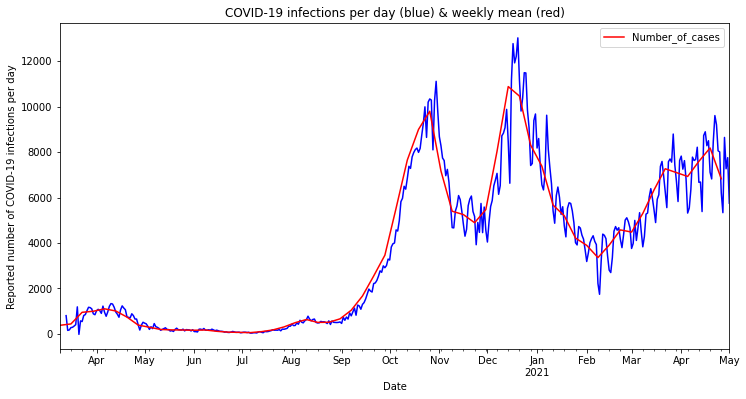

In [28]:
#Plot original time series and weekly mean
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1,1,1)

data_01['Number_of_cases'].plot(ax=ax, color='b')
data_01_weekly_average.plot(ax=ax, color='r')

ax.set_title('COVID-19 infections per day (blue) & weekly mean (red)')
ax.set_xlabel('Date')
ax.set_ylabel('Reported number of COVID-19 infections per day')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

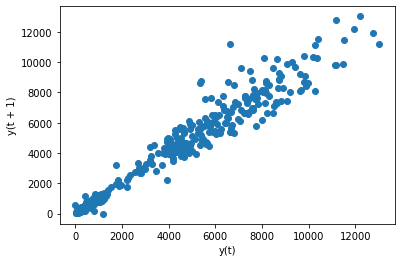

In [29]:
# Lag plot
pd.plotting.lag_plot(data_01, lag=1)


## Hospitalizations per day

In [30]:
#Cumulative function found from source: 
#https://codereview.stackexchange.com/questions/117183/extracting-original-values-from-cumulative-sum-values

cumulative = dutch_data_01['Hospital_admission']

def B(cumulative):
    output = [0] * len(cumulative)
    for i,e in reversed(list(enumerate(cumulative))):
        output[i]=cumulative[i] - cumulative[i-1]
    output[0]=cumulative[0]
    return output

#Shows the daily values for the daily cumulative values
print(B(cumulative))

[115, 21, 26, 43, 109, 94, 81, 159, 188, 152, 242, 265, 341, 315, 349, 454, 529, 507, 722, 447, 625, 501, 336, 253, 260, 292, 308, 237, 225, 190, 196, 147, 210, 188, 182, 156, 129, 110, 75, 118, 124, 137, 123, 100, 75, 65, 88, 76, 84, 85, 93, 41, 36, 79, 20, 33, 71, 58, 22, 36, 35, 52, 27, 35, 45, 15, 27, 34, 14, 13, 9, 10, 13, 8, 10, 7, 16, 9, 5, 8, 9, 6, 9, 12, 11, 3, 4, 5, 6, 5, 3, 5, 9, 6, 3, 3, 2, -1, 11, 0, 3, 2, 2, 6, 4, 5, 0, 3, 3, 3, 1, 0, 4, 1, 1, 0, 2, 3, -2, 1, 3, 2, 1, -2, 5, 1, -4, 1, 3, 2, 2, 0, 3, -1, 2, 2, 5, 6, 3, 5, 7, 3, 6, 6, 10, 5, 1, 4, 2, 7, 6, 10, 9, 6, 11, 7, 6, 5, 4, 18, 10, 18, 11, 8, 4, 15, 19, 7, 9, 2, 3, 11, 5, 6, 5, 7, 5, 5, 9, 6, 8, 17, 10, 6, 17, 8, 24, 15, 14, 12, 33, 20, 26, 32, 32, 25, 36, 29, 37, 38, 46, 48, 47, 22, 30, 24, 59, 80, 63, 50, 66, 49, 53, 58, 111, 74, 74, 85, 80, 69, 84, 93, 101, 110, 112, 92, 109, 77, 109, 91, 80, 106, 117, 109, 89, 103, 100, 98, 89, 121, 94, 54, 74, 72, 92, 87, 92, 96, 86, 79, 104, 93, 64, 82, 67, 50, 81, 74, 64, 77,

In [31]:
data_02 = pd.DataFrame(B(cumulative), index = pd.date_range('03/13/2020', '05/01/2021'), columns = {'Hospital_Admissions'})
data_02_weekly_average = data_02.resample('W').mean()

display(data_02)
display(data_02_weekly_average)

,Hospital_Admissions
2020-03-13,115
2020-03-14,21
2020-03-15,26
2020-03-16,43
2020-03-17,109
...,...
2021-04-27,78
2021-04-28,72
2021-04-29,63
2021-04-30,78


,Hospital_Admissions
2020-03-15,54.000000
2020-03-22,118.000000
2020-03-29,356.428571
2020-04-05,484.428571
2020-04-12,244.000000
2020-04-19,160.285714
2020-04-26,107.428571
2020-05-03,76.000000
2020-05-10,45.571429
2020-05-17,35.000000


Text(0, 0.5, 'Hospital admissions per day')

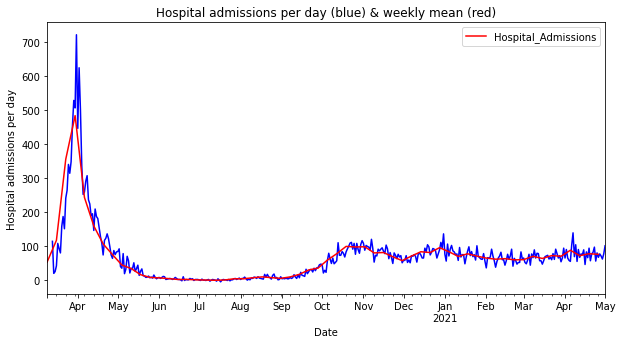

In [32]:
#Plot original time series and weekly mean
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1,1,1)

data_02['Hospital_Admissions'].plot(ax=ax, color='b')
data_02_weekly_average.plot(ax=ax, color='r')

ax.set_title('Hospital admissions per day (blue) & weekly mean (red)')
ax.set_xlabel('Date')
ax.set_ylabel('Hospital admissions per day')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

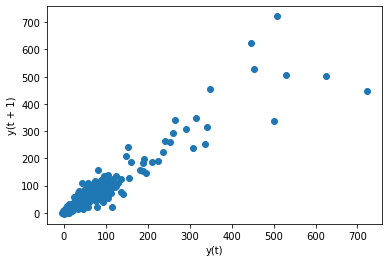

In [33]:
# Lag plot
pd.plotting.lag_plot(data_02, lag=1)

## COVID-19 deaths per day

In [34]:
cumulative = dutch_data_01['Deceased']

def B(cumulative):
    output = [0] * len(cumulative)
    for i,e in reversed(list(enumerate(cumulative))):
        output[i]=cumulative[i] - cumulative[i-1]
    output[0]=cumulative[0]
    return output

#Shows the daily values for the daily cumulative values
print(B(cumulative))

[9, 3, 7, 4, 17, 16, 21, 28, 31, 44, 33, 63, 80, 78, 112, 93, 132, 93, 175, 134, 166, 148, 164, 117, 99, 234, 147, 148, 115, 132, 94, 86, 122, 189, 181, 144, 142, 83, 67, 165, 138, 123, 112, 120, 66, 43, 48, 145, 84, 98, 94, 69, 26, 86, 36, 84, 71, 63, 18, 16, 54, 52, 28, 53, 27, 10, 14, 21, 33, 27, 13, 23, 11, 8, 26, 15, 32, 28, 20, 5, 6, 5, 10, 13, 15, 6, 2, 3, 15, 11, 2, 9, 4, 2, 6, 5, 4, 4, 3, 8, 1, 0, 5, 2, 3, 3, 2, 0, 2, 6, 2, 3, 2, 6, 1, 1, 4, 3, 2, -1, 1, 0, 0, -2, 1, 1, 1, -2, 0, 0, 0, 3, 0, 0, 1, 0, 1, 4, 2, 0, 0, 1, 1, 0, 1, 3, 0, 1, 3, 0, 0, 2, 2, 4, 2, 2, 3, 0, 3, 6, 10, 4, 5, 0, 2, 5, 8, 3, 2, 4, 0, 0, 6, 5, 0, 2, 4, 2, 0, 1, 2, 3, 3, 1, 1, 2, 2, 2, 6, 7, 2, 4, 2, 10, 5, 16, 16, 38, 8, 6, 13, 13, 13, 9, 21, 5, 7, 21, 36, 13, 13, 23, 17, 12, 35, 32, 29, 16, 29, 14, 17, 46, 59, 46, 45, 55, 27, 26, 70, 60, 56, 87, 50, 39, 29, 113, 106, 87, 118, 73, 44, 39, 98, 74, 89, 54, 85, 43, 44, 86, 82, 73, 51, 48, 21, 54, 90, 74, 75, 83, 59, 23, 27, 62, 66, 61, 58, 39, 25, 17, 71, 66, 

In [35]:
data_03 = pd.DataFrame(B(cumulative), index = pd.date_range('03/13/2020', '05/01/2021'), columns = {'Deceased'})
data_03_weekly_average = data_03.resample('W').mean()

display(data_03)
display(data_03_weekly_average)

,Deceased
2020-03-13,9
2020-03-14,3
2020-03-15,7
2020-03-16,4
2020-03-17,17
...,...
2021-04-27,31
2021-04-28,11
2021-04-29,20
2021-04-30,24


,Deceased
2020-03-15,6.333333
2020-03-22,23.000000
2020-03-29,84.428571
2020-04-05,142.428571
2020-04-12,138.428571
2020-04-19,135.285714
2020-04-26,113.000000
2020-05-03,83.000000
2020-05-10,54.857143
2020-05-17,34.285714


Text(0, 0.5, 'COVID-19 deaths')

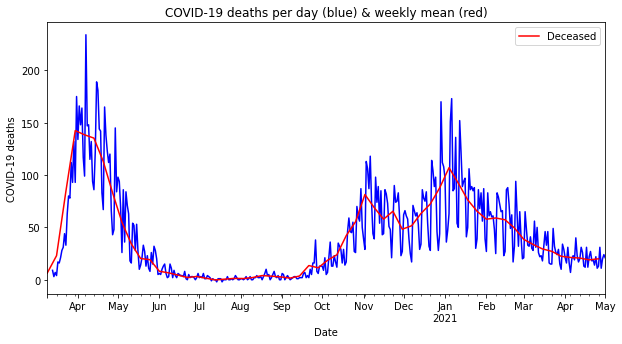

In [36]:
#Plot original time series and weekly mean
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1,1,1)

data_03['Deceased'].plot(ax=ax, color='b')
data_03_weekly_average.plot(ax=ax, color='r')

ax.set_title('COVID-19 deaths per day (blue) & weekly mean (red)')
ax.set_xlabel('Date')
ax.set_ylabel('COVID-19 deaths')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

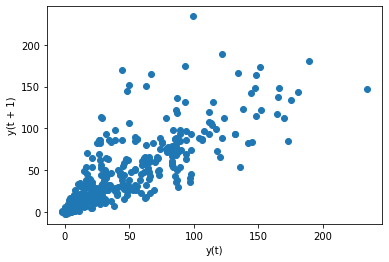

In [37]:
# Lag plot
pd.plotting.lag_plot(data_03, lag=1)

### Mean, median, and standard deviation of COVID-19 cases

In [38]:
data_01.describe()

,Number_of_cases
count,415.000000
mean,3619.534940
std,3359.585296
min,-20.000000
25%,438.000000
50%,3252.000000
75%,6173.000000
max,13032.000000


In [39]:
data_01_new = data_01.reset_index()
data_01_new = data_01_new.rename(columns={'index': 'date'})


In [40]:
data_01_new.index = data_01_new['date'].map(lambda d: pd.to_datetime(d, format = '%Y-%m-%d'))
data_01_new['Month_Year'] = data_01_new.index.map(lambda d: d.strftime('%m-%Y'))
display(data_01_new)

,date,Number_of_cases,Month_Year
date,,,
2020-03-13,2020-03-13,804,03-2020
2020-03-14,2020-03-14,155,03-2020
2020-03-15,2020-03-15,176,03-2020
2020-03-16,2020-03-16,278,03-2020
2020-03-17,2020-03-17,292,03-2020
...,...,...,...
2021-04-27,2021-04-27,5337,04-2021
2021-04-28,2021-04-28,8649,04-2021
2021-04-29,2021-04-29,7271,04-2021


In [41]:
monthly_stats = data_01_new.groupby(by='Month_Year')['Number_of_cases'].aggregate([np.mean, np.median,
                                                                           np.std])
monthly_stats.reset_index(inplace=True)
monthly_stats.head(20)

,Month_Year,mean,median,std
0,01-2021,5854.645161,5598.0,1486.548117
1,02-2021,3936.250000,4177.5,845.273991
2,03-2020,662.894737,804.0,387.239933
3,03-2021,5933.096774,5924.0,1350.224706
4,04-2020,890.700000,928.0,287.204979
5,04-2021,7457.866667,7655.5,1165.433107
6,05-2020,229.870968,198.0,94.732163
7,05-2021,5755.000000,5755.0,NaN
8,06-2020,127.700000,112.5,53.110912
9,07-2020,129.935484,103.0,82.589723


In [42]:
monthly_stats['Year'] = monthly_stats['Month_Year']\
                        .map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%Y'))
monthly_stats['Month'] = monthly_stats['Month_Year']\
                        .map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%m'))
monthly_stats.sort_values(by=['Year', 'Month'], inplace=True)
monthly_stats.head(15)

monthly_stats.index = monthly_stats['Month_Year']
#monthly_stats.index

Text(0.5, 1.0, 'Monthly statistics: Mean (blue) & Std. Dev. (red)')

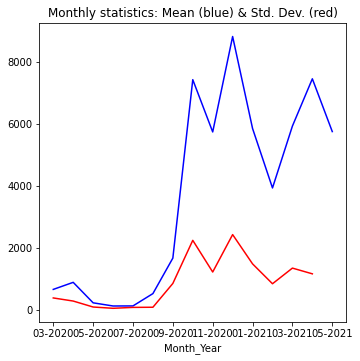

In [43]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)

monthly_stats['mean'].plot(ax=ax, color='b')
monthly_stats['std'].plot(ax=ax, color='r')

ax.set_title('Monthly statistics: Mean (blue) & Std. Dev. (red)')


## Merging of the three dataframes

In [44]:
merged_COVID_19 = pd.concat([data_01,data_02,data_03], join='inner', axis=1)
display(merged_COVID_19)
merged_COVID_19.dtypes

,Number_of_cases,Hospital_Admissions,Deceased
2020-03-13,804,115,9
2020-03-14,155,21,3
2020-03-15,176,26,7
2020-03-16,278,43,4
2020-03-17,292,109,17
...,...,...,...
2021-04-27,5337,78,31
2021-04-28,8649,72,11
2021-04-29,7271,63,20
2021-04-30,7758,78,24


Number_of_cases        int64
Hospital_Admissions    int64
Deceased               int64
dtype: object

In [45]:
merged_COVID_19.describe()

,Number_of_cases,Hospital_Admissions,Deceased
count,415.000000,415.000000,415.000000
mean,3619.534940,69.301205,41.371084
std,3359.585296,84.499540,42.682313
min,-20.000000,-4.000000,-2.000000
25%,438.000000,11.000000,6.000000
50%,3252.000000,63.000000,27.000000
75%,6173.000000,84.000000,65.000000
max,13032.000000,722.000000,234.000000


In [46]:
#CHECK FOR MISSING DATA
#a value of 0.0 means no missing data
merged_COVID_19.isna().sum()/merged_COVID_19.shape[0]

Number_of_cases        0.0
Hospital_Admissions    0.0
Deceased               0.0
dtype: float64

## Boxplot visualisation

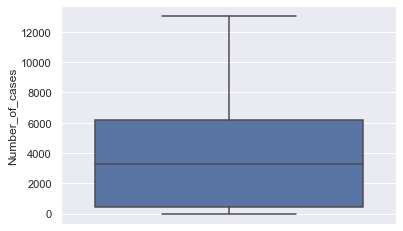

In [47]:
sns.set(style="darkgrid")

sns.set_theme()
sns.boxplot(y=merged_COVID_19["Number_of_cases"])
plt.show()


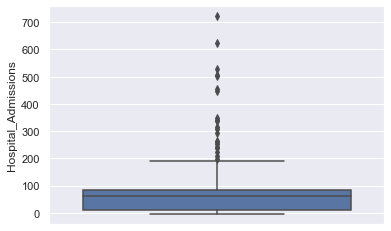

In [48]:
sns.set(style="darkgrid")

sns.set_theme()
sns.boxplot(y=merged_COVID_19["Hospital_Admissions"])
plt.show()

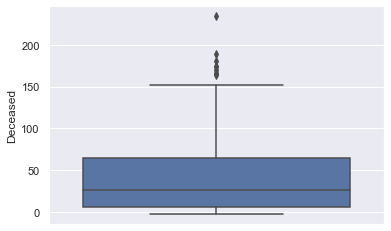

In [49]:
sns.set(style="darkgrid")

sns.set_theme()
sns.boxplot(y=merged_COVID_19["Deceased"])
plt.show()

VERSION: 19TH OF JUNE, 2021
